In [19]:
# imports
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import  cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.dummy import DummyClassifier

from sklearn.base import clone
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve

import numpy as np

In [3]:
# MNIST

mnist = fetch_openml('mnist_784', as_frame=False) # since this data set contains images as frame is set as false
X, y = mnist.data, mnist.target
mnist.target_names

['class']

(70000, 784) (70000,) There are 70000 images and each image has 784 features.
 That is because each image is 28 X 28 pixels and each feature simply represents one pixels intensity from 0 to 255


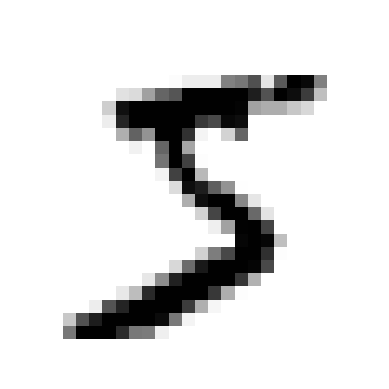

In [4]:
print(X.shape, y.shape, f'There are {X.shape[0]} images and each image has {X.shape[1]} features.\n That is because each image is 28 X 28 pixels and each feature simply represents one pixels intensity from 0 to 255')

def plot_digit(image_data):
      image = image_data.reshape(28, 28)
      plt.imshow(image,cmap='binary')
      plt.axis("off")
      
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [6]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

array([ True])

In [7]:
cross_val_score(sgd_clf, X_train, y_train_5, scoring='accuracy', cv=3)

array([0.95035, 0.96035, 0.9604 ])

In [8]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))
cross_val_score(dummy_clf, X_train, y_train_5, scoring='accuracy', cv=3)

False


array([0.90965, 0.90965, 0.90965])

In [9]:
skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    
    X_train_fold = X_train[train_index]
    X_test_fold = X_train[test_index]
    y_train_fold = y_train_5[train_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_fold, y_train_fold)
    y_pred = clone_clf.predict(X_test_fold)
    correct_preds = sum(y_pred == y_test_fold)
    print(correct_preds/len(y_pred))

0.95035
0.96035
0.9604


In [16]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
cm = confusion_matrix(y_train_5, y_train_pred)
ps = precision_score(y_train_5, y_train_pred)
rs = recall_score(y_train_5, y_train_pred)
f1 = f1_score(y_train_5, y_train_pred)
print(f'Precision Score {ps * 100}, Recall Score {rs * 100}, F1 Score {f1}')

Precision Score 83.70879772350011, Recall Score 65.11713705958311, F1 Score 0.7325171197343847


In [18]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores
threshold = 0
y_scores > threshold
threshold = 3000
y_scores > threshold

array([False])

In [35]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

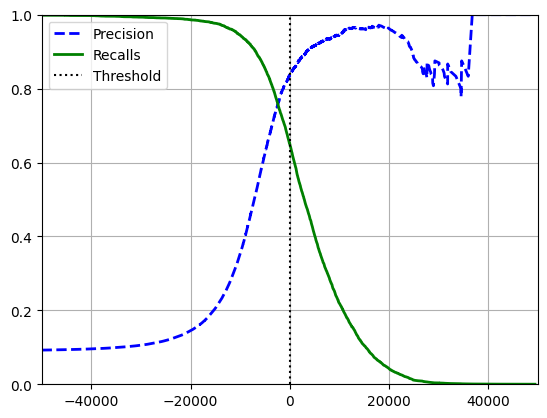

In [48]:
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision', linewidth=2)
plt.plot(thresholds, recalls[:-1], 'g-', label='Recalls', linewidth=2)
plt.vlines(0, 0, 1.0, 'k', 'dotted', label='Threshold')
plt.grid()
plt.axis([-50000, 50000, 0, 1])
plt.legend()
plt.show()


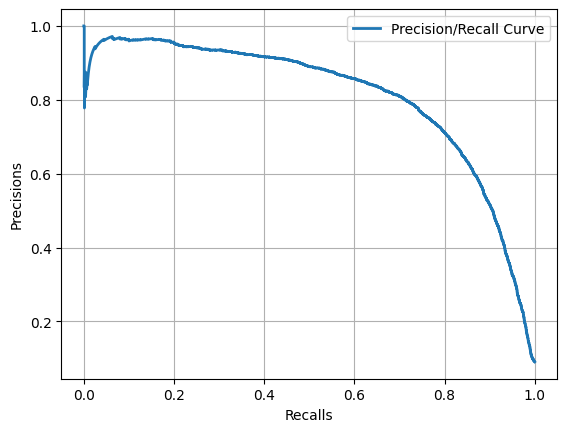

In [50]:
plt.plot(recalls, precisions, linewidth=2, label='Precision/Recall Curve')
plt.xlabel("Recalls")
plt.ylabel("Precisions")
plt.grid()
plt.legend()
plt.show()

In [51]:
idx_for_90_precision = (precisions >= .90).argmax()
threshold_for_precision_90 = thresholds[idx_for_90_precision]
threshold_for_precision_90

3370.0194991439557

In [52]:
y_train_preds_90 = (y_scores >= threshold_for_precision_90)
precision_score(y_train_5, y_train_preds_90)

y_train_preds_90 = (y_scores >= threshold_for_precision_90)
recall_score(y_train_5, y_train_preds_90)

0.4799852425751706